In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from utils import * 
import time 
from matplotlib import pyplot as plt 

In [11]:
df = pd.read_csv("dataset/body_level_classification_train.csv")
df_original= cleaning_data(df).copy()
all_class_train,all_class_test=data_spliting(df_original,1/3)

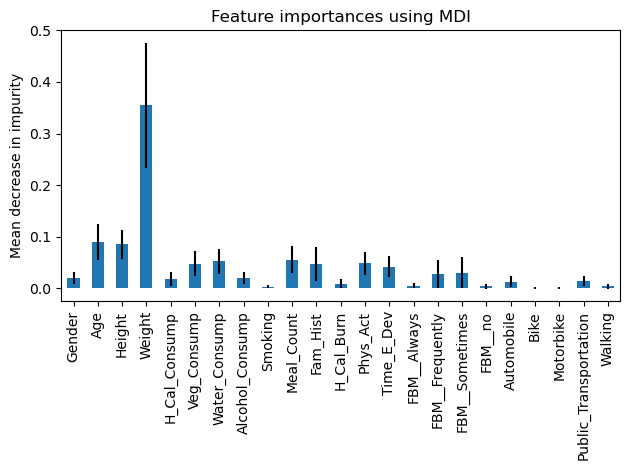

In [13]:

X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

feature_names = [f"{i}" for i in all_class_train.drop("Body_Level",axis=1).columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

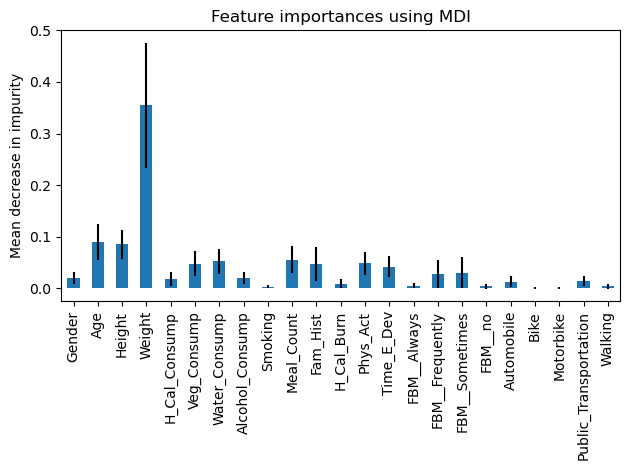

In [14]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
for i in df.drop("Body_Level",axis=1).columns:
    print(i)

Gender
Age
Height
Weight
H_Cal_Consump
Veg_Consump
Water_Consump
Alcohol_Consump
Smoking
Meal_Count
Food_Between_Meals
Fam_Hist
H_Cal_Burn
Phys_Act
Time_E_Dev
Transport
